<a href="https://colab.research.google.com/github/Ashish265/Machine-Learning-projects/blob/master/Fuel_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [0]:
import pandas as pd
import numpy as np

## Loading the data file


In [0]:
df = pd.read_excel('/content/data_set.xlsx')

## Head of the data

In [3]:
df.head()

,Company Id,DateTime,ON/OFF,Level of Fuel,PF,KiloWatt,KWH,ErrorCode
0,25502921,2018-08-16 10:23:36,0,175.000,0.0,0.0,0.0,0
1,25502921,2018-08-16 10:33:55,0,155.557,0.0,0.0,0.0,0
2,25502921,2018-08-16 10:43:55,0,153.615,0.0,0.0,0.0,0
3,25502921,2018-08-16 10:53:55,0,152.512,0.0,0.0,0.0,0
4,25502921,2018-08-16 11:03:55,0,151.393,0.0,0.0,0.0,0


## Shape of the data

In [4]:
df.shape

(72791, 8)

## Description of the data

In [5]:
df.describe()

,Company Id,ON/OFF,Level of Fuel,PF,KiloWatt,KWH,ErrorCode
count,7.279100e+04,72791.000000,72791.000000,72791.000000,72791.000000,72791.000000,72791.000000
mean,2.586443e+07,0.739803,59.082768,0.629396,40.175533,97422.598230,0.127571
std,1.102099e+05,0.438745,70.602640,0.395924,34.756753,100400.128583,0.333613
min,2.550292e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.575028e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.592136e+07,1.000000,42.704000,0.837000,41.000000,36637.699219,0.000000
75%,2.592716e+07,1.000000,97.546600,0.903000,69.800000,215813.750000,0.000000
max,2.592716e+07,1.000000,450.000000,0.999000,162.200000,252365.500000,1.000000


## Information of the data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72791 entries, 0 to 72790
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company Id     72791 non-null  int64         
 1   DateTime       72791 non-null  datetime64[ns]
 2   ON/OFF         72791 non-null  int64         
 3   Level of Fuel  72791 non-null  float64       
 4   PF             72791 non-null  float64       
 5   KiloWatt       72791 non-null  float64       
 6   KWH            72791 non-null  float64       
 7   ErrorCode      72791 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 4.4 MB


## Understanding the types of machine and data points for each category of the machine

In [7]:
df['Company Id'].value_counts()

25927159    31585
25750275    16306
25921010    11124
25921355    10111
25502921     3665
Name: Company Id, dtype: int64

## Observation for ON and OFF

In [8]:
df['ON/OFF'].value_counts()

1    53851
0    18940
Name: ON/OFF, dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


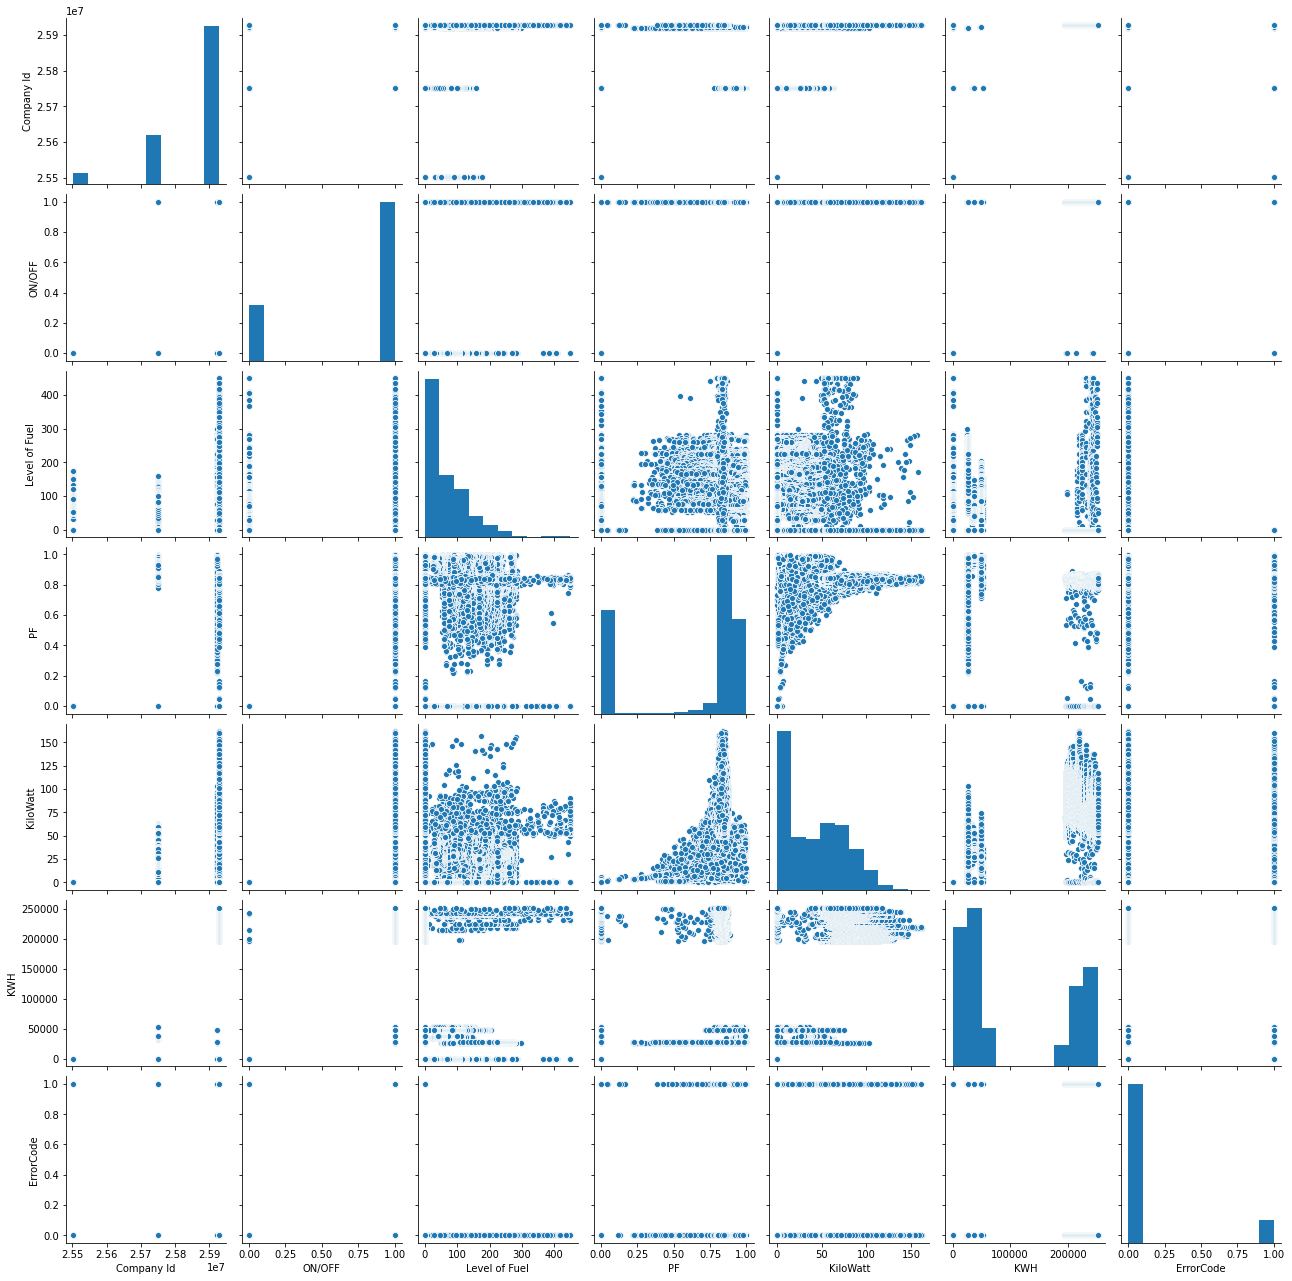

In [10]:
sns.pairplot(df)

## Replacing the spaces in the column name with the "-"

In [0]:
labels = [col.replace(' ','_') for col in df.columns]

In [12]:
labels


['Company_Id',
 'DateTime',
 'ON/OFF',
 'Level_of_Fuel',
 'PF',
 'KiloWatt',
 'KWH',
 'ErrorCode']

## Changing the column names

In [0]:
df.columns =labels

In [14]:
df.head()

,Company_Id,DateTime,ON/OFF,Level_of_Fuel,PF,KiloWatt,KWH,ErrorCode
0,25502921,2018-08-16 10:23:36,0,175.000,0.0,0.0,0.0,0
1,25502921,2018-08-16 10:33:55,0,155.557,0.0,0.0,0.0,0
2,25502921,2018-08-16 10:43:55,0,153.615,0.0,0.0,0.0,0
3,25502921,2018-08-16 10:53:55,0,152.512,0.0,0.0,0.0,0
4,25502921,2018-08-16 11:03:55,0,151.393,0.0,0.0,0.0,0


## Changing the machine tpye from the numeric to category

In [0]:
df['Company_Id'] = df['Company_Id'].astype('category')

## Behavior of level of fuel with other features

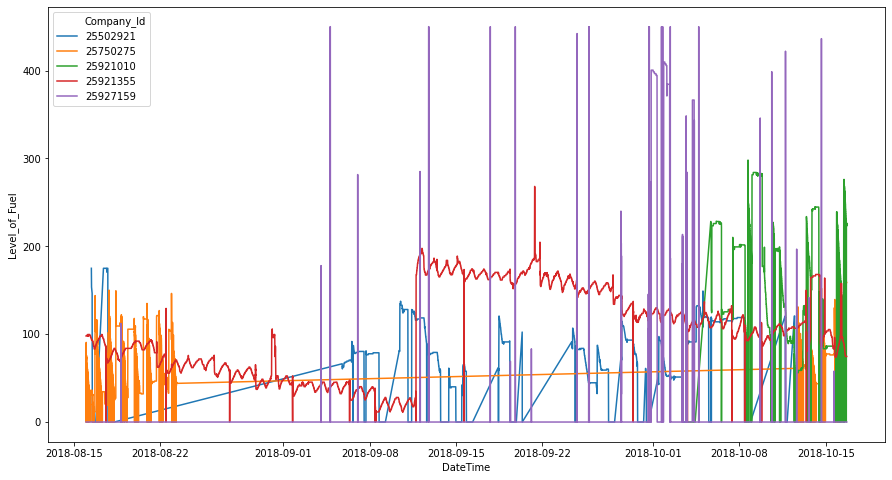

In [16]:
plt.figure(figsize=(15,8))
sns.lineplot(x="DateTime", y="Level_of_Fuel",hue='Company_Id' ,data=df)

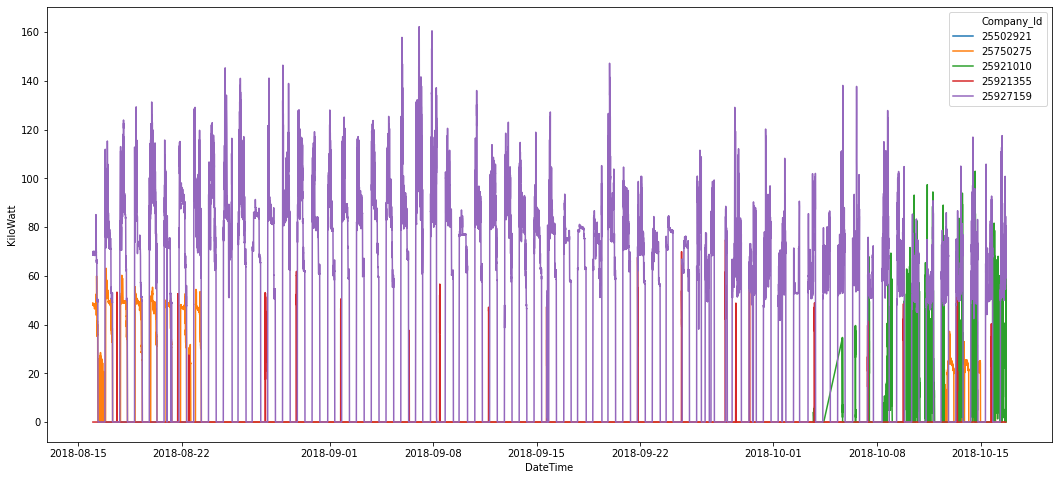

In [17]:
plt.figure(figsize=(18,8))
sns.lineplot(x="DateTime", y="KiloWatt",hue='Company_Id' ,data=df)

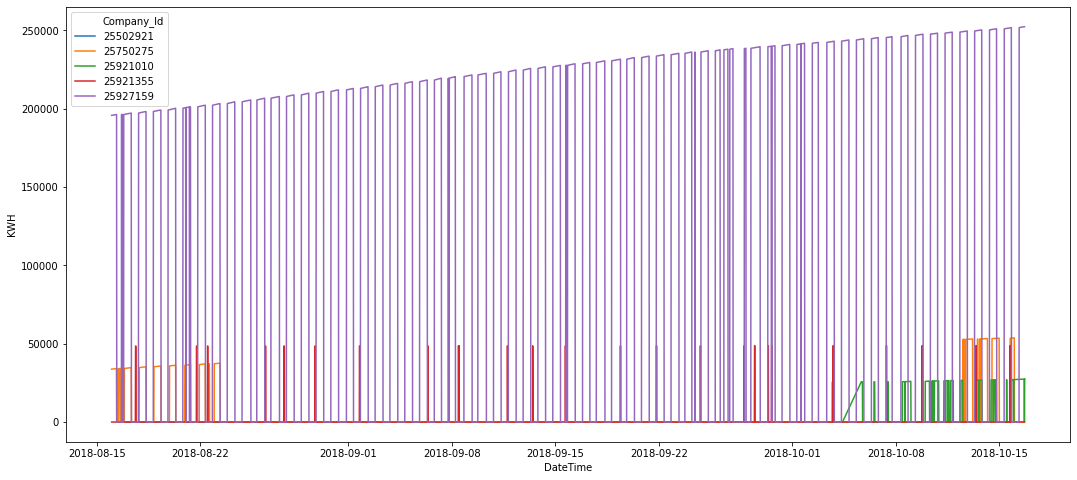

In [18]:
plt.figure(figsize=(18,8))
sns.lineplot(x="DateTime", y="KWH",hue='Company_Id' ,data=df)

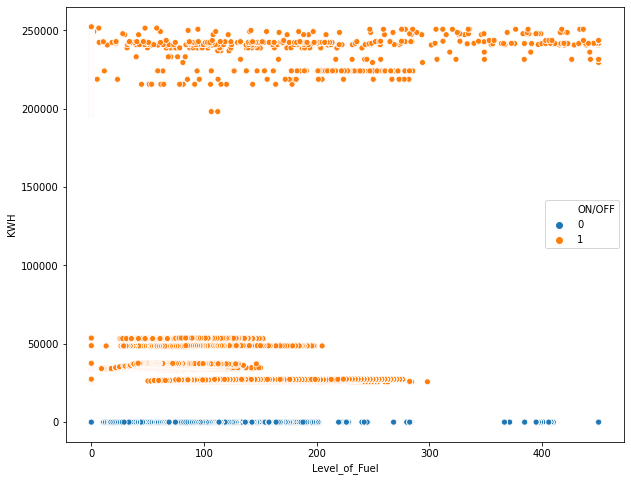

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Level_of_Fuel',y='KWH',hue='ON/OFF',data=df)

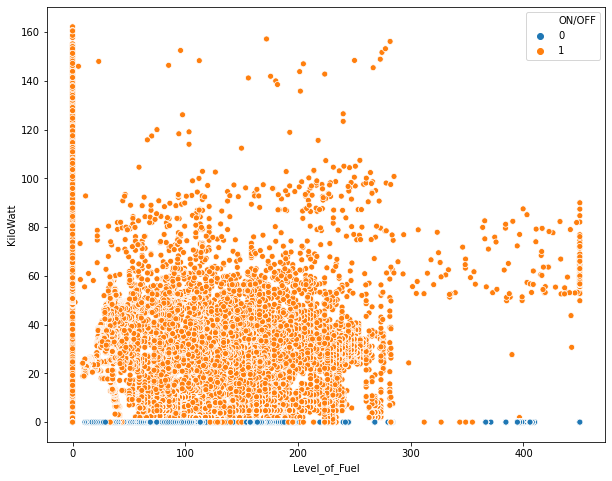

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Level_of_Fuel',y='KiloWatt',hue='ON/OFF',data=df)

In [21]:
df[df['Company_Id']==25502921].describe()

,ON/OFF,Level_of_Fuel,PF,KiloWatt,KWH,ErrorCode
count,3665.0,3665.000000,3665.0,3665.0,3665.0,3665.000000
mean,0.0,66.795354,0.0,0.0,0.0,0.228377
std,0.0,45.942110,0.0,0.0,0.0,0.419844
min,0.0,0.000000,0.0,0.0,0.0,0.000000
25%,0.0,30.660000,0.0,0.0,0.0,0.000000
50%,0.0,77.700000,0.0,0.0,0.0,0.000000
75%,0.0,105.052000,0.0,0.0,0.0,0.000000
max,0.0,175.000000,0.0,0.0,0.0,1.000000


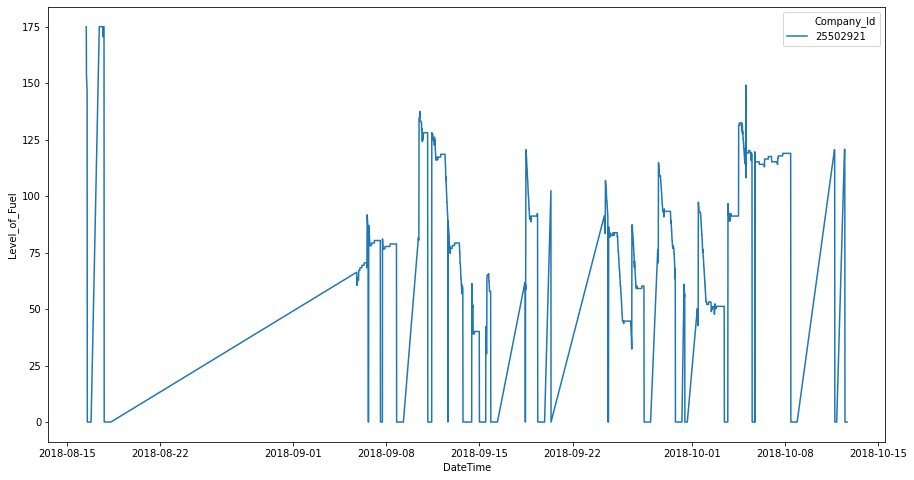

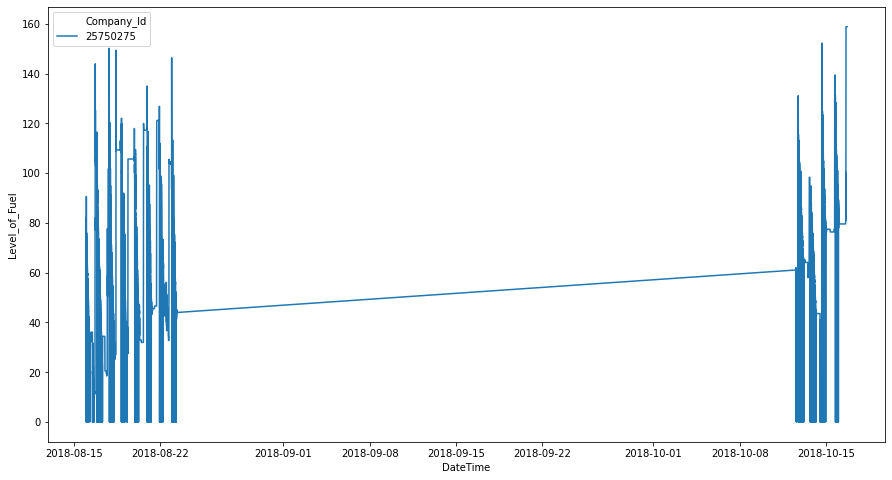

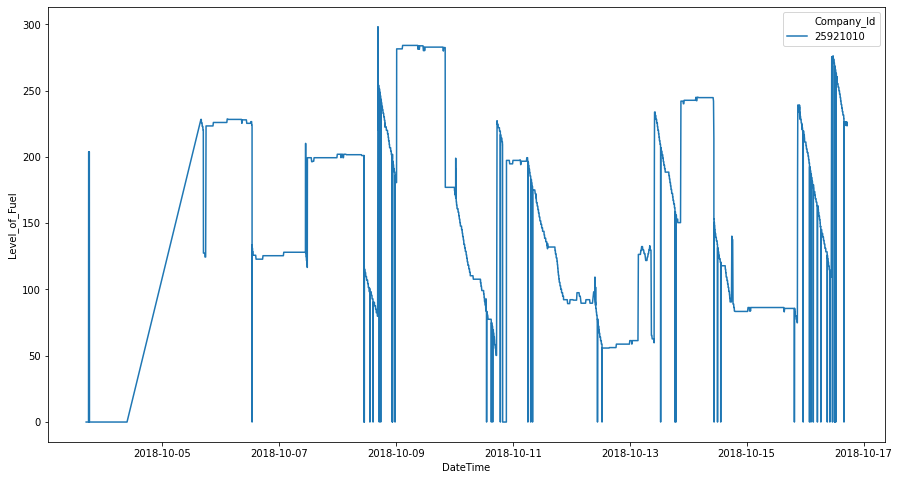

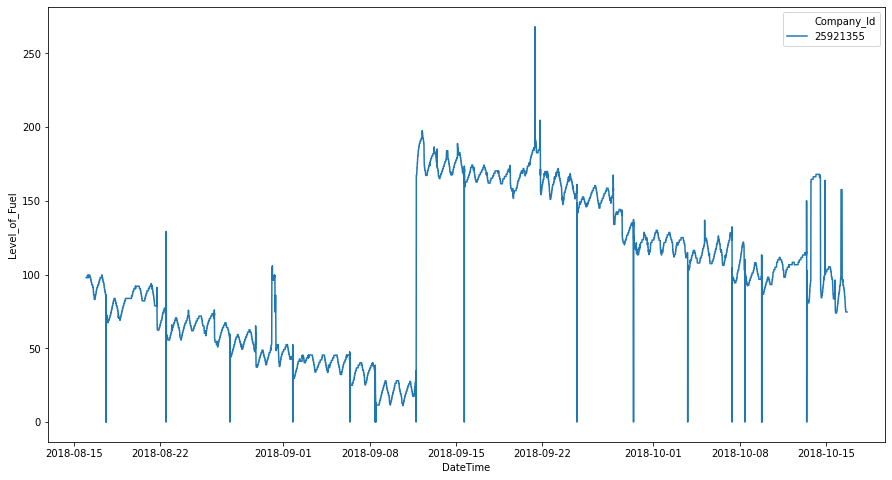

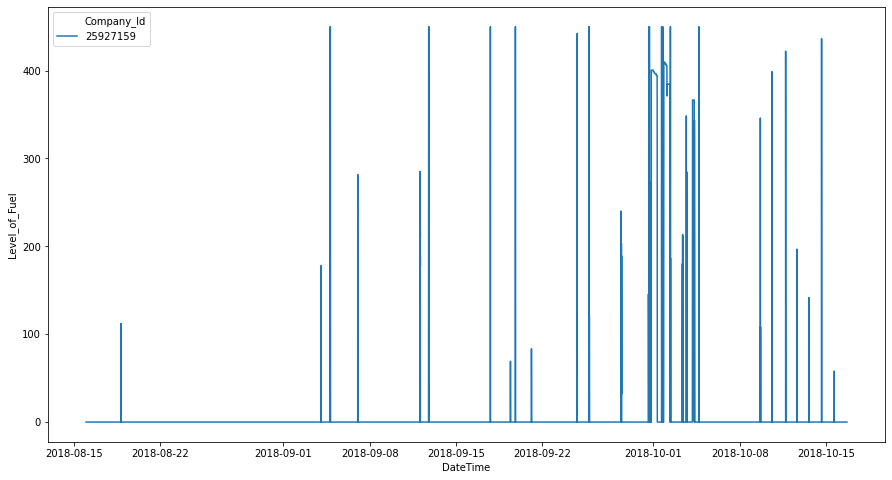

In [36]:
for comp_Id in pd.unique(df['Company_Id']):
  df_temp = df[df['Company_Id']== comp_Id]

  plt.figure(figsize=(15,8))
  sns.lineplot(x="DateTime", y="Level_of_Fuel",hue='Company_Id' ,data=df_temp)
  plt.show()



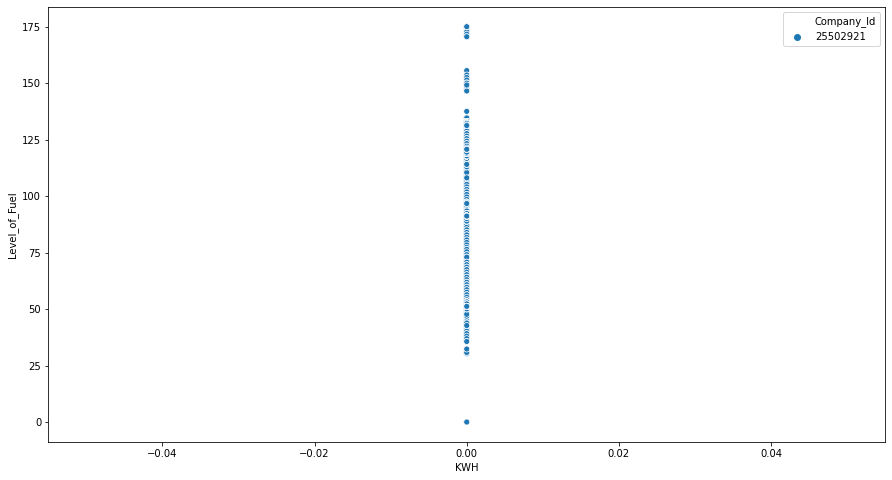

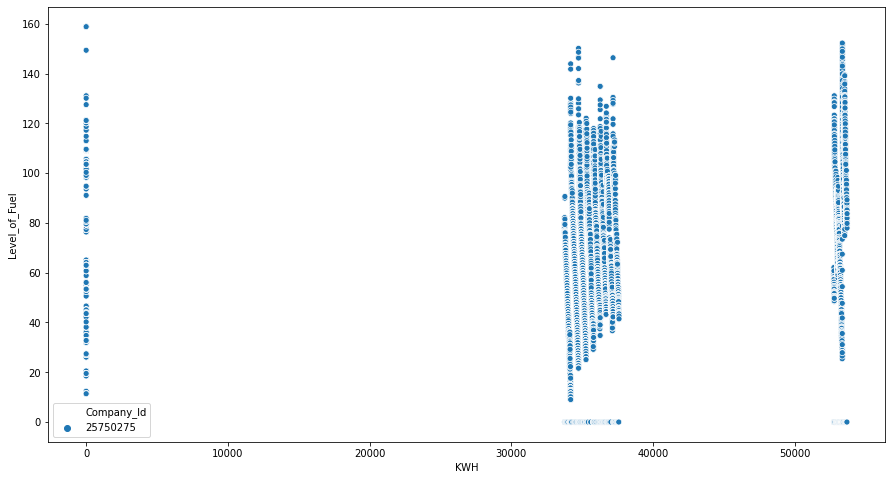

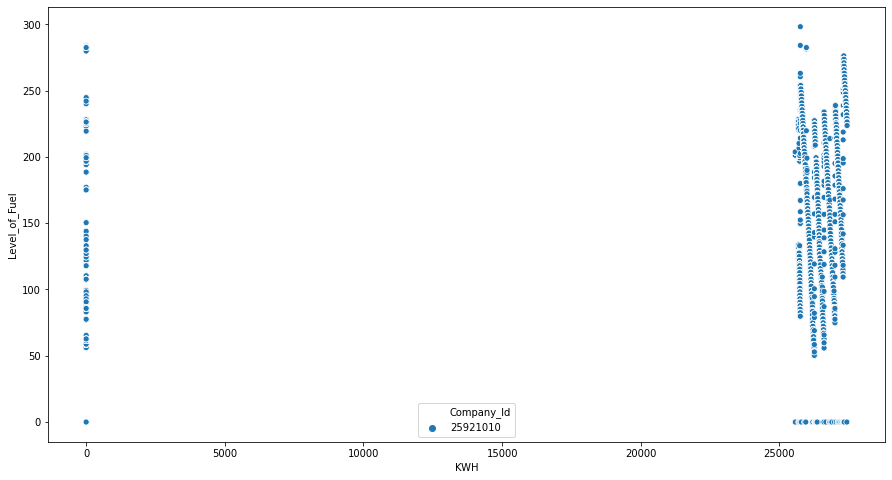

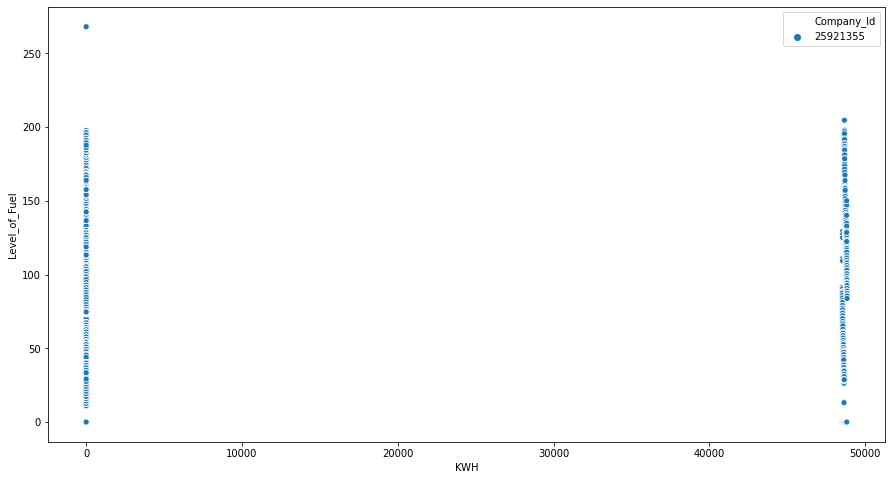

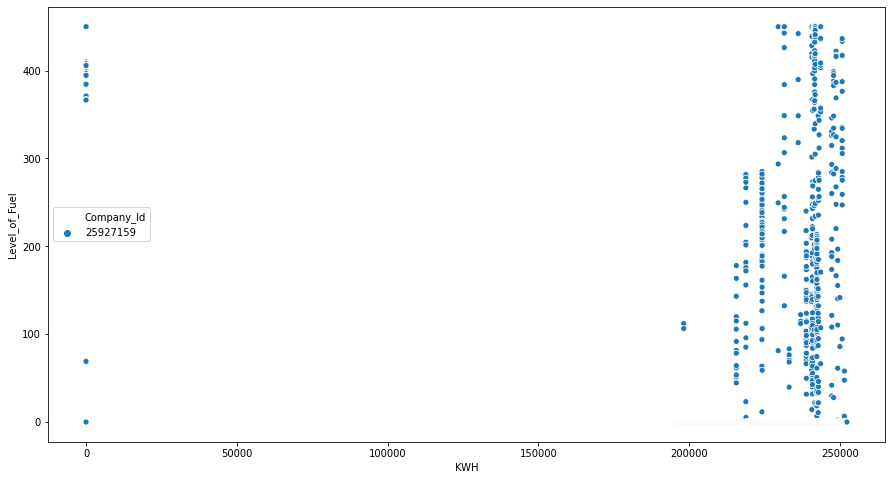

In [37]:
for comp_Id in pd.unique(df['Company_Id']):
  df_temp = df[df['Company_Id']== comp_Id]

  plt.figure(figsize=(15,8))
  sns.scatterplot(x="KWH", y="Level_of_Fuel",hue='Company_Id' ,data=df_temp)
  plt.show()

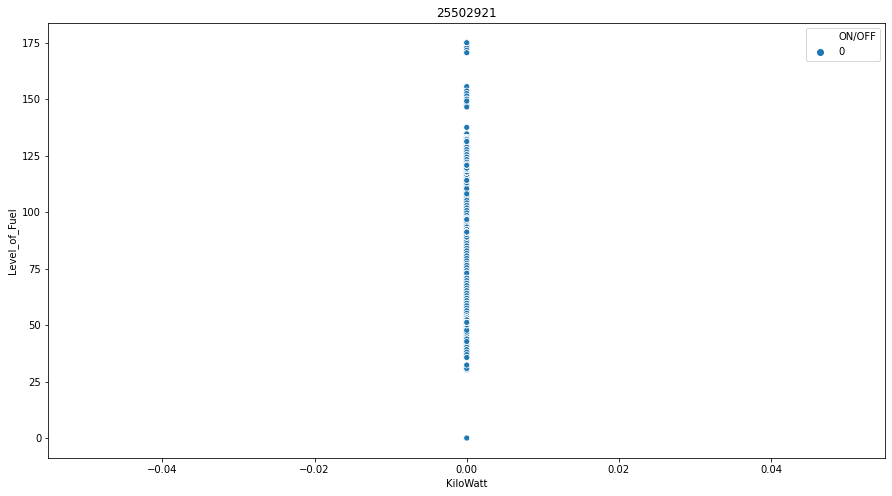

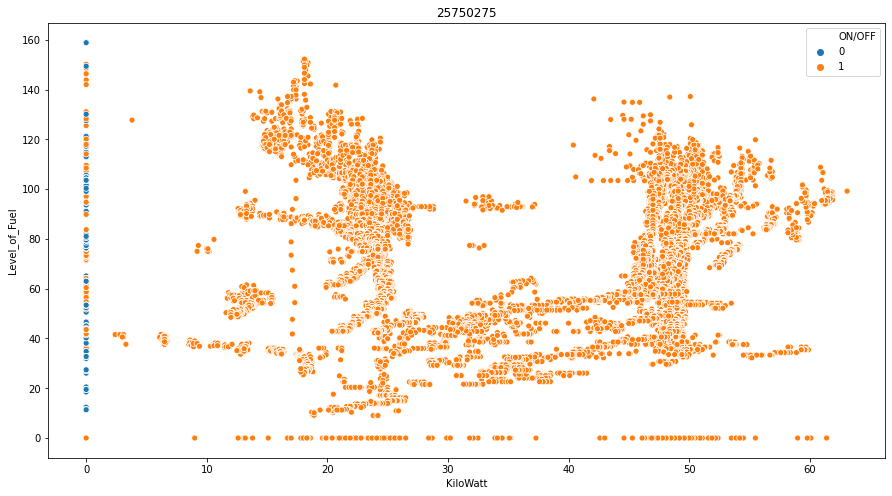

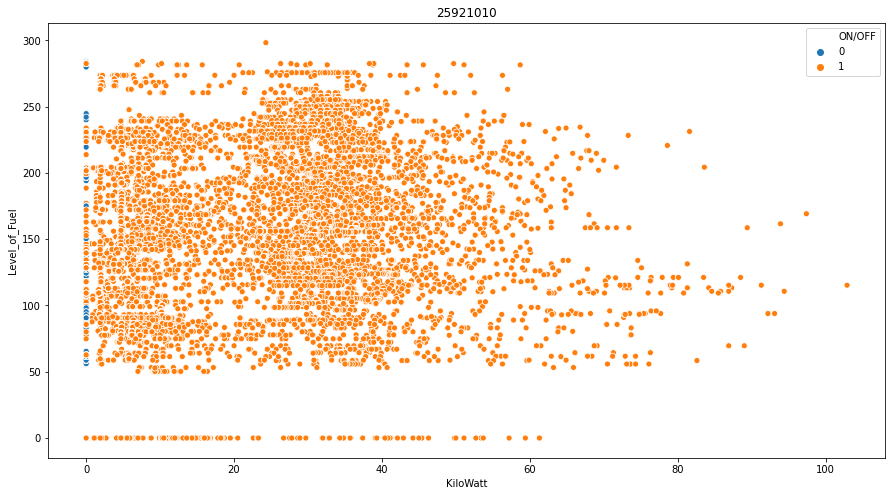

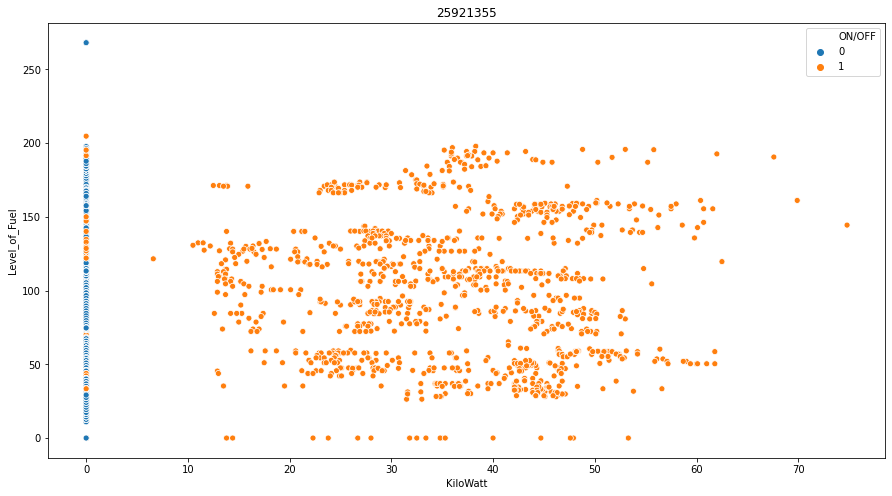

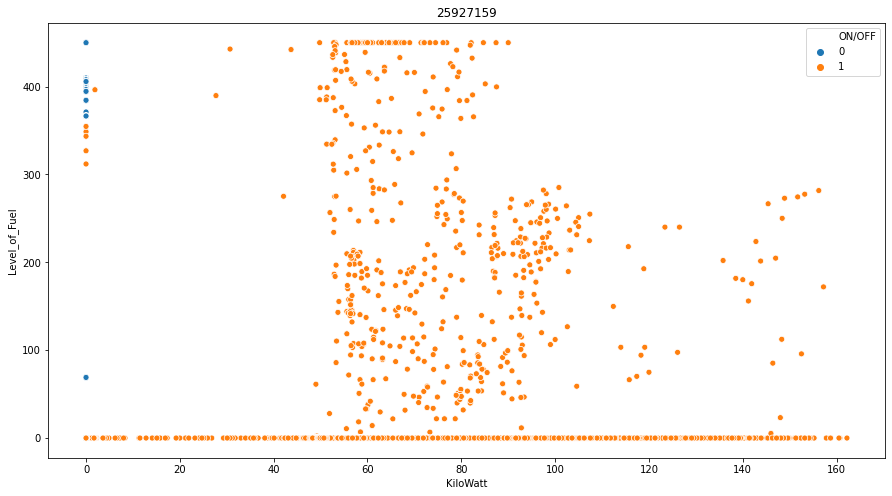

In [87]:
for comp_Id in pd.unique(df['Company_Id']):
  df_temp = df[df['Company_Id']== comp_Id]

  plt.figure(figsize=(15,8))
  sns.scatterplot(x="KiloWatt", y="Level_of_Fuel",hue='ON/OFF' ,data=df_temp)
  plt.title(comp_Id)
  plt.show()

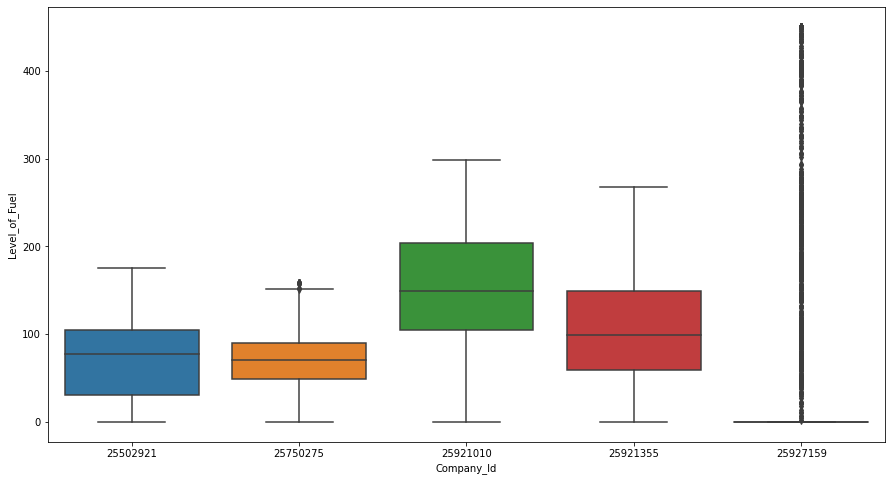

In [39]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Company_Id", y="Level_of_Fuel",data=df)


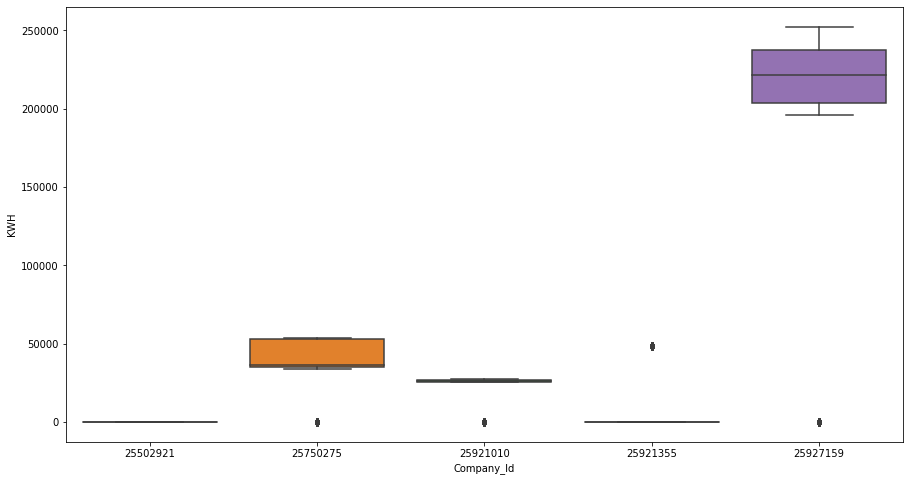

In [88]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Company_Id", y="KWH",data=df)

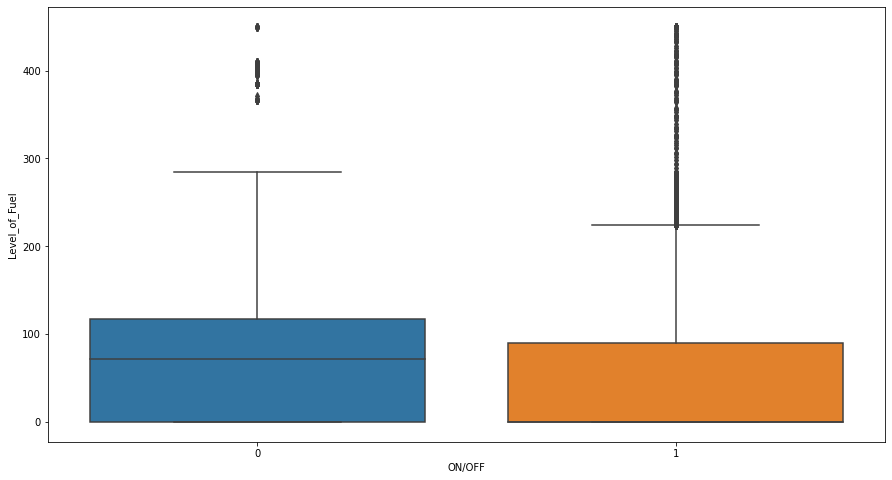

In [40]:
plt.figure(figsize=(15,8))
sns.boxplot(x="ON/OFF", y="Level_of_Fuel",data=df)

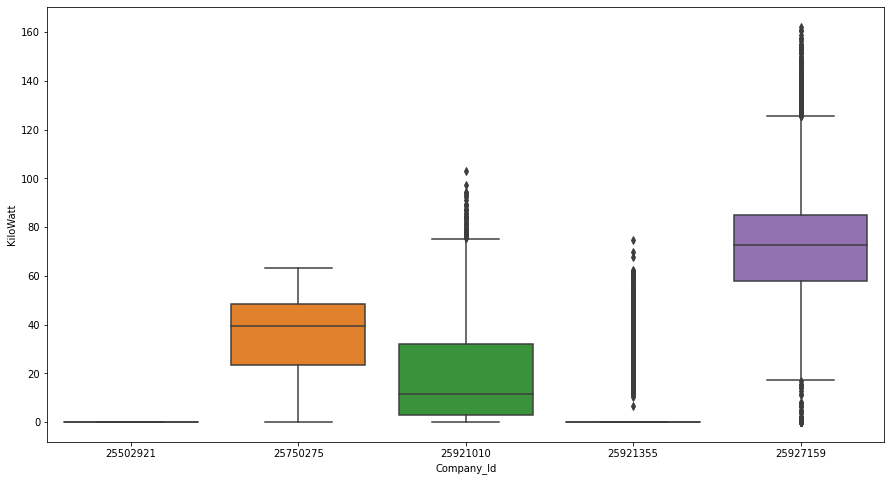

In [42]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Company_Id", y="KiloWatt",data=df)

In [0]:
from sklearn.ensemble import IsolationForest

In [44]:
df

,Company_Id,DateTime,ON/OFF,Level_of_Fuel,PF,KiloWatt,KWH,ErrorCode
0,25502921,2018-08-16 10:23:36,0,175.000,0.000,0.0,0.000000,0
1,25502921,2018-08-16 10:33:55,0,155.557,0.000,0.0,0.000000,0
2,25502921,2018-08-16 10:43:55,0,153.615,0.000,0.0,0.000000,0
3,25502921,2018-08-16 10:53:55,0,152.512,0.000,0.0,0.000000,0
4,25502921,2018-08-16 11:03:55,0,151.393,0.000,0.0,0.000000,0
...,...,...,...,...,...,...,...,...
72786,25927159,2018-10-16 16:48:40,1,0.000,0.846,59.2,252356.203125,0
72787,25927159,2018-10-16 16:49:10,1,0.000,0.844,62.3,252356.593750,1
72788,25927159,2018-10-16 16:51:25,1,0.000,0.805,80.5,252359.593750,0
72789,25927159,2018-10-16 16:53:50,1,0.000,0.829,71.9,252362.500000,0


In [0]:
df_on = df[df['ON/OFF']==1]

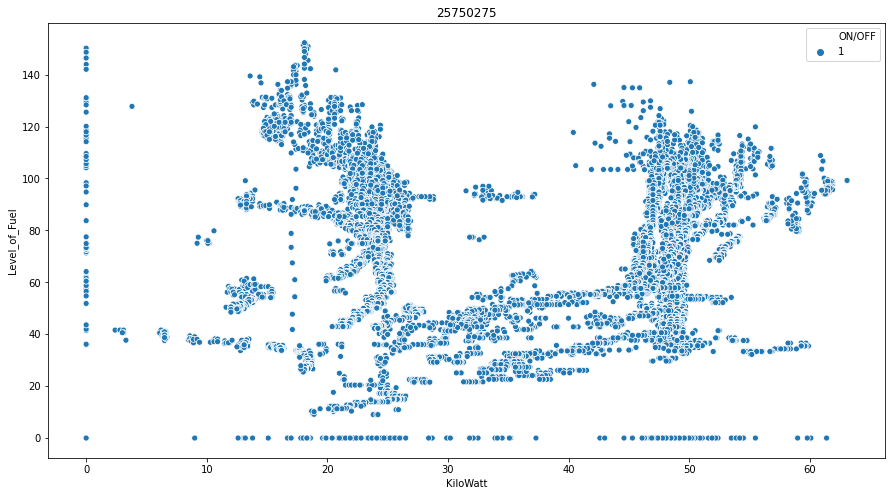

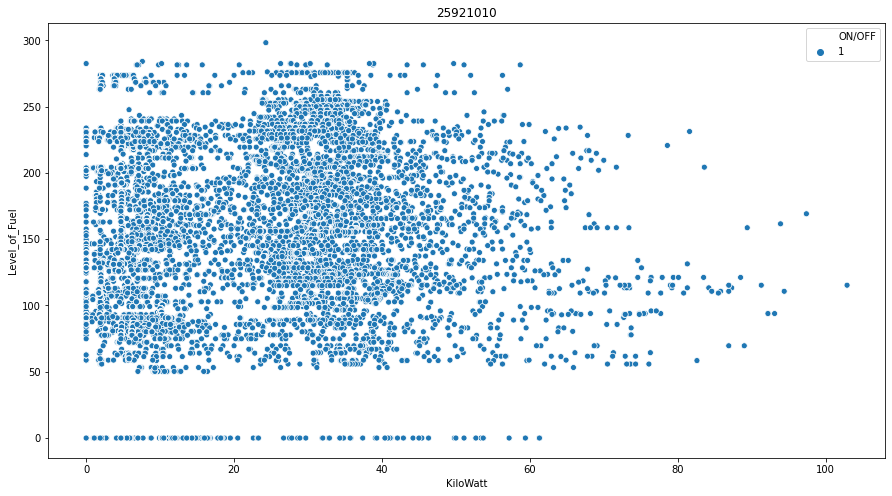

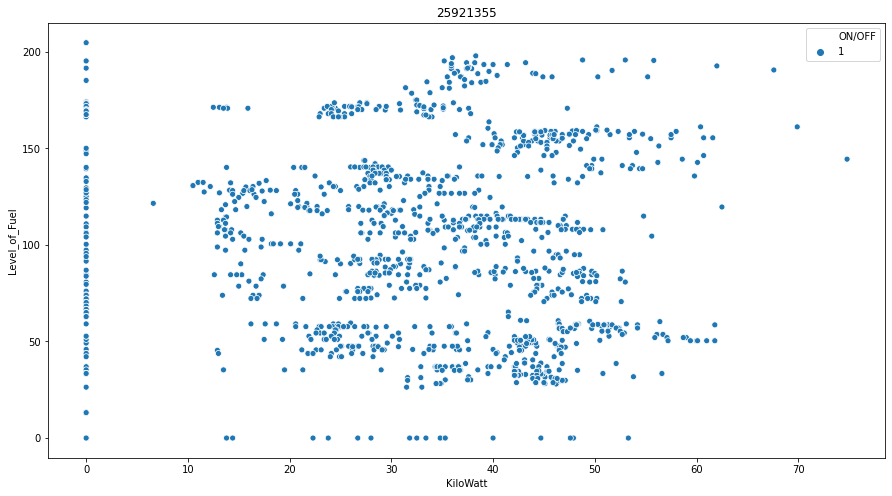

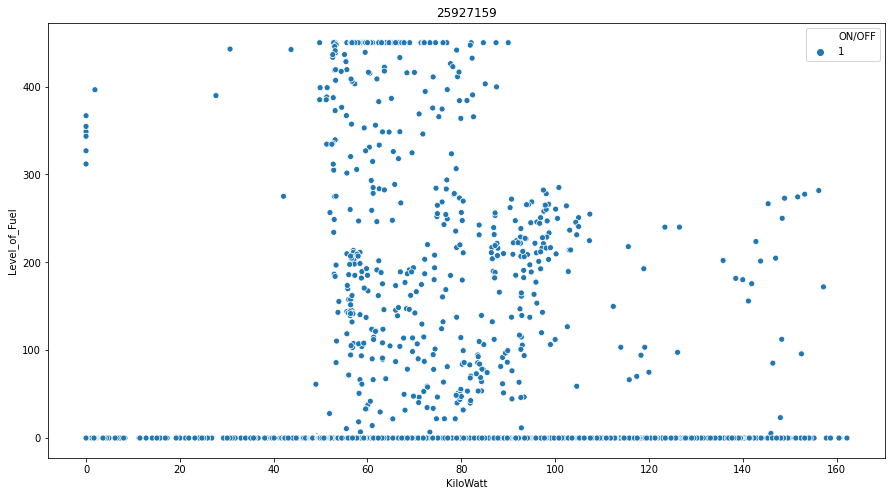

In [86]:
for comp_Id in pd.unique(df_on['Company_Id']):
  df_temp = df_on[df_on['Company_Id']== comp_Id]

  plt.figure(figsize=(15,8))
  sns.scatterplot(x="KiloWatt", y="Level_of_Fuel",hue='ON/OFF' ,data=df_temp)
  plt.title(comp_Id)
  plt.show()

In [0]:
df_off = df[df['ON/OFF']==0]

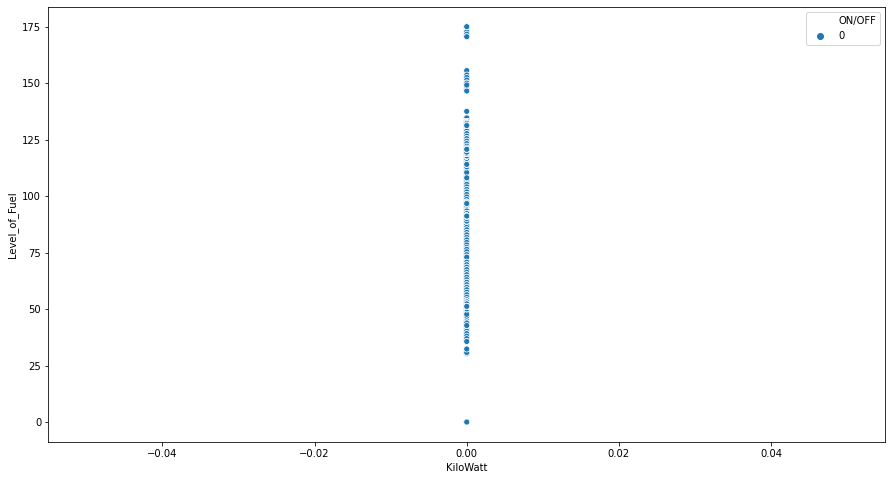

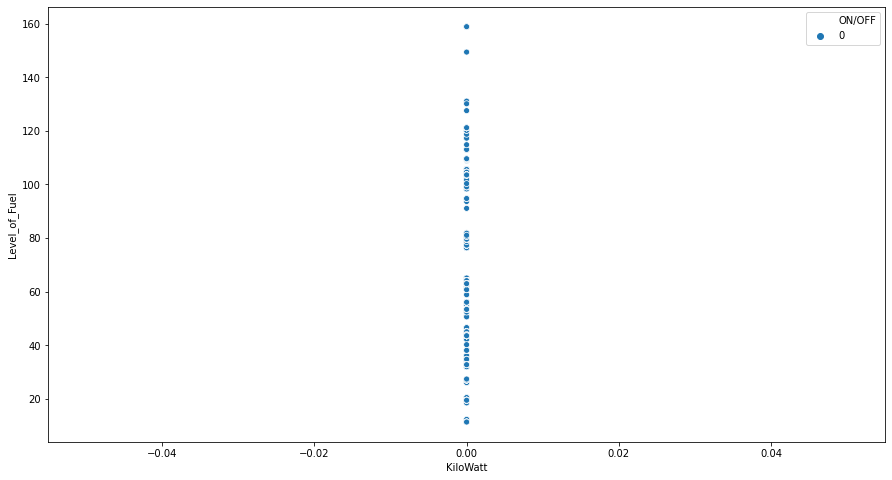

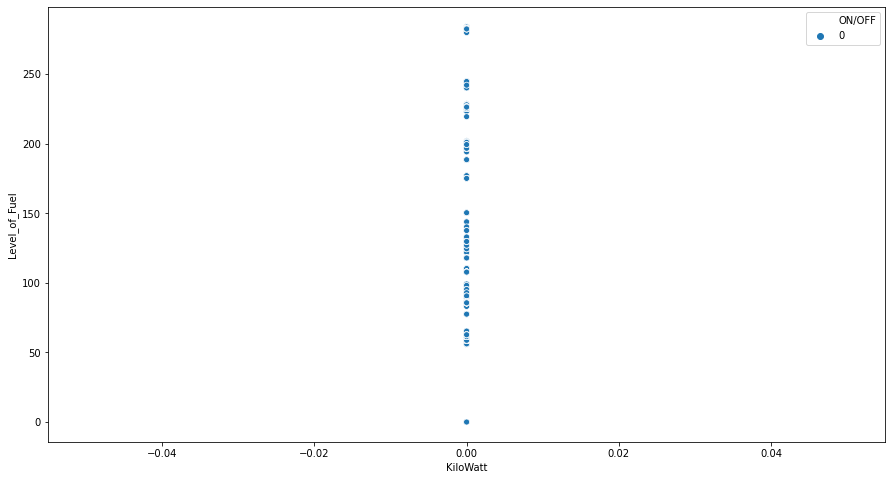

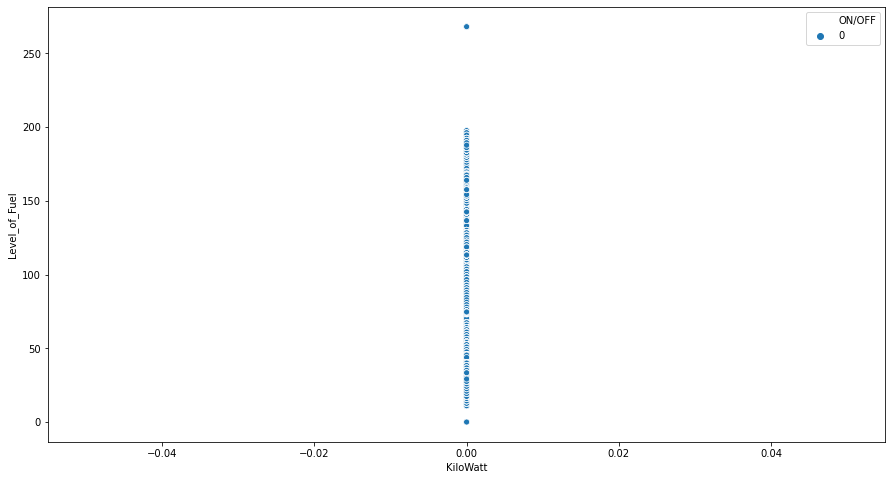

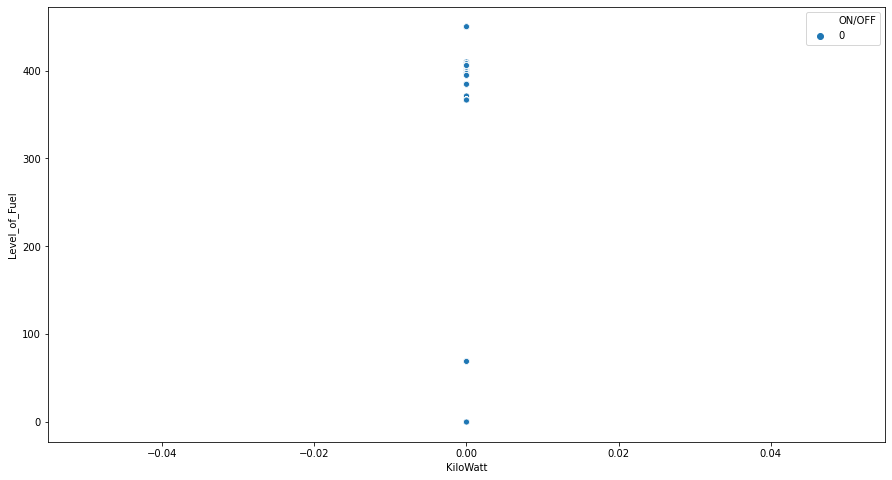

In [48]:
for comp_Id in pd.unique(df_off['Company_Id']):
  df_temp = df_off[df_off['Company_Id']== comp_Id]

  plt.figure(figsize=(15,8))
  sns.scatterplot(x="KiloWatt", y="Level_of_Fuel",hue='ON/OFF' ,data=df_temp)
  plt.show()

In [49]:
abs(df['Level_of_Fuel'].diff(periods = 1))

0           NaN
1        19.443
2         1.942
3         1.103
4         1.119
          ...  
72786     0.000
72787     0.000
72788     0.000
72789     0.000
72790     0.000
Name: Level_of_Fuel, Length: 72791, dtype: float64

In [0]:
df_new = df.copy()

In [0]:
df_new.sort_index(inplace=True)

In [0]:
df_new['Fuel_consumed'] = abs(df_new['Level_of_Fuel'].diff(periods = 1))

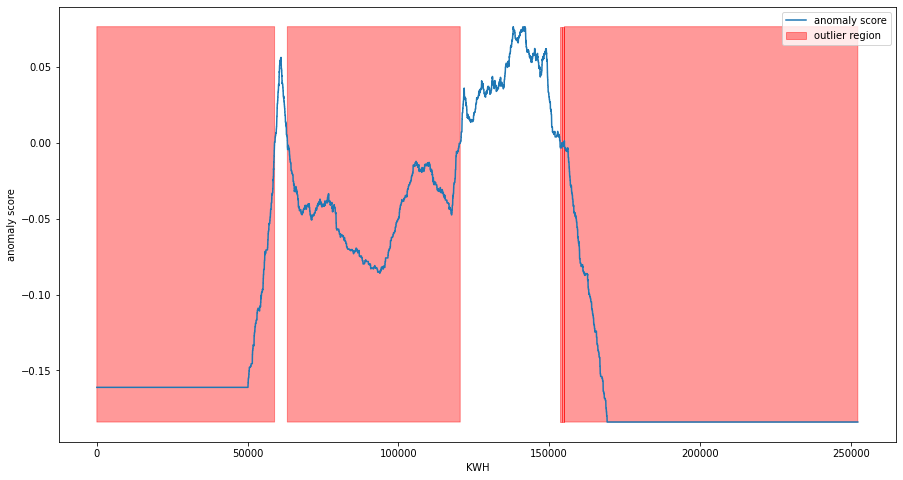

In [91]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df_new_resampled['KWH'].values.reshape(-1, 1))
xx = np.linspace(df_new['KWH'].min(), df_new['KWH'].max(), len(df_new)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(15,8))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('KWH')
plt.show();

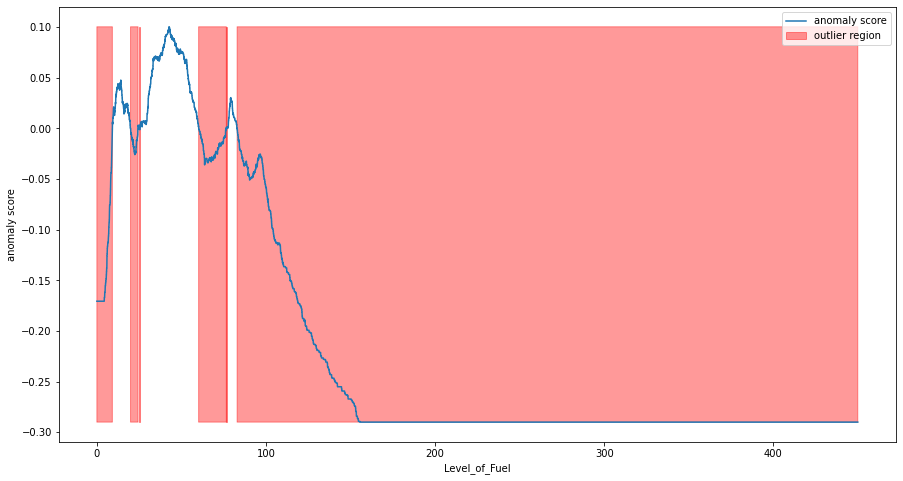

In [92]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df_new_resampled['Level_of_Fuel'].values.reshape(-1, 1))
xx = np.linspace(df_new['Level_of_Fuel'].min(), df_new['Level_of_Fuel'].max(), len(df_new)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(15,8))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Level_of_Fuel')
plt.show();

In [83]:
df_new[df_new['Level_of_Fuel']==0]['ErrorCode'].value_counts()

0    23219
1     9286
Name: ErrorCode, dtype: int64

In [0]:
df_new[df_new['Company_Id']==25502921]

,Company_Id,ON/OFF,Level_of_Fuel,PF,KiloWatt,KWH,ErrorCode,Fuel_consumed
DateTime,,,,,,,,
2018-08-16 10:23:36,25502921,0,175.000,0.0,0.0,0.0,0,0.000
2018-08-16 10:33:55,25502921,0,155.557,0.0,0.0,0.0,0,19.443
2018-08-16 10:43:55,25502921,0,153.615,0.0,0.0,0.0,0,1.942
2018-08-16 10:53:55,25502921,0,152.512,0.0,0.0,0.0,0,1.103
2018-08-16 11:03:55,25502921,0,151.393,0.0,0.0,0.0,0,1.119
...,...,...,...,...,...,...,...,...
2018-10-12 15:05:56,25502921,0,0.000,0.0,0.0,0.0,0,0.000
2018-10-12 15:15:56,25502921,0,0.000,0.0,0.0,0.0,1,0.000
2018-10-12 15:25:57,25502921,0,0.000,0.0,0.0,0.0,1,0.000


In [73]:
df_new[df_new['Company_Id']==25927159]

,Company_Id,ON/OFF,Level_of_Fuel,PF,KiloWatt,KWH,ErrorCode,Fuel_consumed
DateTime,,,,,,,,
2018-08-16 00:01:16,25927159,1,0.0,0.847,69.0,195766.093750,1,74.6528
2018-08-16 00:02:11,25927159,1,0.0,0.847,69.0,195767.203125,0,0.0000
2018-08-16 00:04:12,25927159,1,0.0,0.847,70.0,195769.500000,0,0.0000
2018-08-16 00:06:22,25927159,1,0.0,0.847,68.5,195772.000000,0,0.0000
2018-08-16 00:10:02,25927159,1,0.0,0.847,70.0,195776.203125,0,0.0000
...,...,...,...,...,...,...,...,...
2018-10-16 16:48:40,25927159,1,0.0,0.846,59.2,252356.203125,0,0.0000
2018-10-16 16:49:10,25927159,1,0.0,0.844,62.3,252356.593750,1,0.0000
2018-10-16 16:51:25,25927159,1,0.0,0.805,80.5,252359.593750,0,0.0000


In [0]:
df_new['Fuel_consumed'] = df_new['Fuel_consumed'].fillna(0)

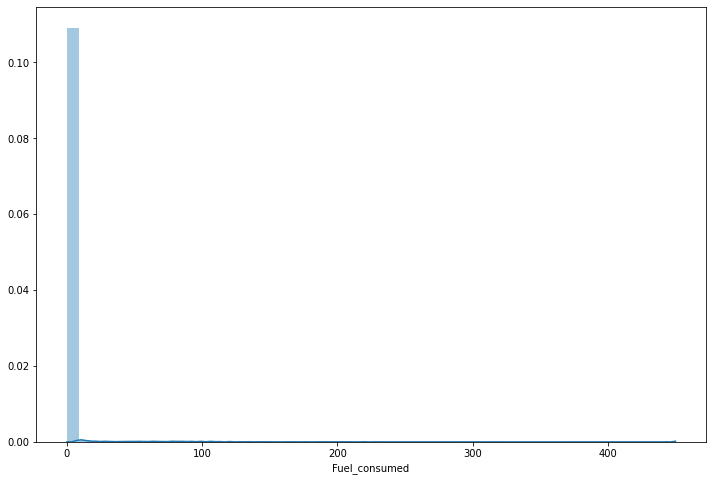

In [54]:
plt.figure(figsize=(12,8))
sns.distplot(df_new['Fuel_consumed'] )

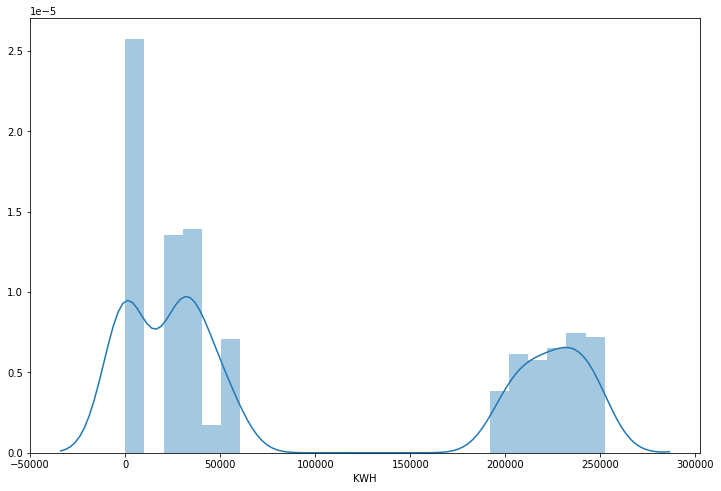

In [68]:
plt.figure(figsize=(12,8))
sns.distplot(df_new['KWH'] )

In [55]:
df_new.describe()

,ON/OFF,Level_of_Fuel,PF,KiloWatt,KWH,ErrorCode,Fuel_consumed
count,72791.000000,72791.000000,72791.000000,72791.000000,72791.000000,72791.000000,72791.000000
mean,0.739803,59.082768,0.629396,40.175533,97422.598230,0.127571,1.755785
std,0.438745,70.602640,0.395924,34.756753,100400.128583,0.333613,17.120738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,42.704000,0.837000,41.000000,36637.699219,0.000000,0.000000
75%,1.000000,97.546600,0.903000,69.800000,215813.750000,0.000000,0.000000
max,1.000000,450.000000,0.999000,162.200000,252365.500000,1.000000,450.000000


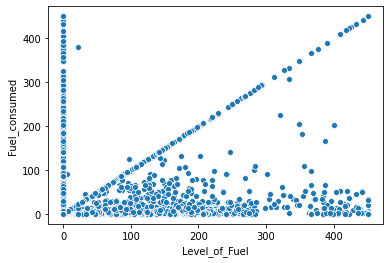

In [56]:
sns.scatterplot(x="Level_of_Fuel",y='Fuel_consumed',data = df_new)

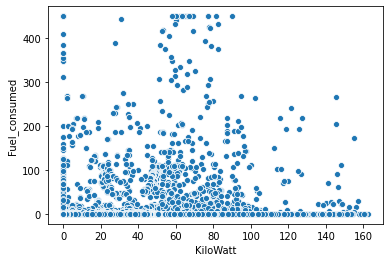

In [57]:
sns.scatterplot(x="KiloWatt",y='Fuel_consumed',data = df_new)


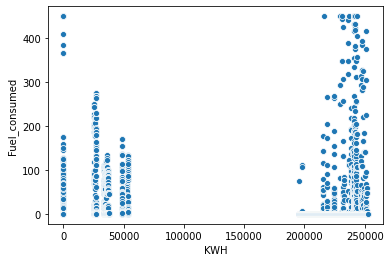

In [58]:
sns.scatterplot(x="KWH",y='Fuel_consumed',data = df_new)

In [0]:
df_new = df_new.set_index('DateTime',drop=True)

In [0]:
df_new_resampled = df_new.resample('D').mean()

In [61]:
df_new_resampled

,ON/OFF,Level_of_Fuel,PF,KiloWatt,KWH,ErrorCode,Fuel_consumed
DateTime,,,,,,,
2018-08-16,0.874751,44.849725,0.802355,42.457256,61136.648736,0.071571,1.522032
2018-08-17,0.829212,51.746067,0.767534,44.006044,60178.921542,0.081960,1.942790
2018-08-18,0.840614,50.381114,0.785713,47.830917,60776.769492,0.074412,1.767162
2018-08-19,0.857349,47.148755,0.792578,47.653602,75164.372520,0.102305,1.132773
2018-08-20,0.839958,49.025617,0.778392,50.191097,72319.752526,0.077371,1.393913
...,...,...,...,...,...,...,...
2018-10-12,0.819361,63.753373,0.694621,25.356091,78718.733883,0.075035,1.813914
2018-10-13,0.884580,104.001523,0.732512,24.210342,61416.392959,0.031702,1.953100
2018-10-14,0.892050,78.976166,0.788252,24.017219,62844.807348,0.029041,2.289301


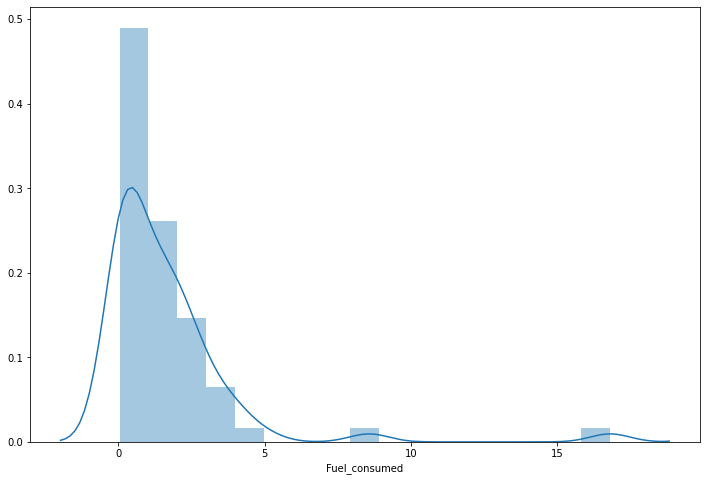

In [62]:
plt.figure(figsize=(12,8))
sns.distplot(df_new_resampled['Fuel_consumed'] )

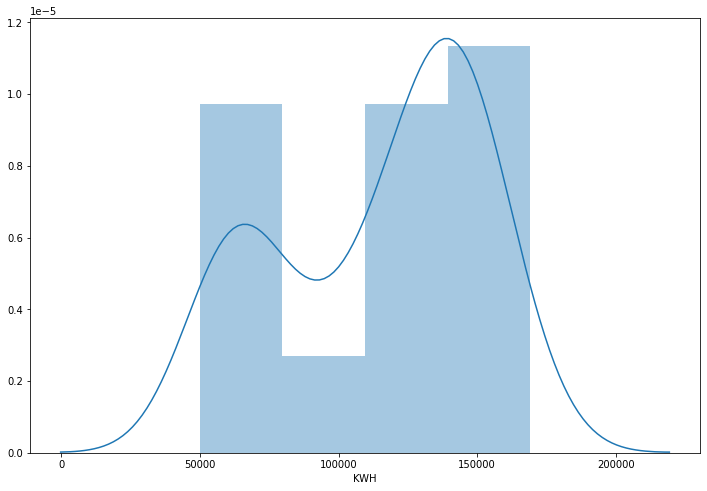

In [69]:
plt.figure(figsize=(12,8))
sns.distplot(df_new_resampled['KWH'] )

In [0]:
X_train = df_new_resampled['Fuel_consumed'].loc['2018-08-16':"2018-09-24"]
X_test = df_new_resampled['Fuel_consumed'].loc["2018-09-24":]

In [64]:
X_train.shape


(40,)

In [65]:
X_test.shape

(23,)

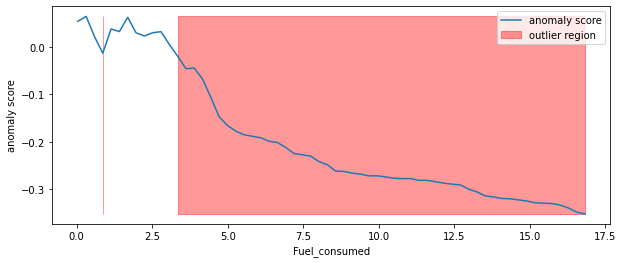

In [66]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df_new_resampled['Fuel_consumed'].values.reshape(-1, 1))
xx = np.linspace(df_new_resampled['Fuel_consumed'].min(), df_new_resampled['Fuel_consumed'].max(), len(df_new_resampled)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Fuel_consumed')
plt.show();

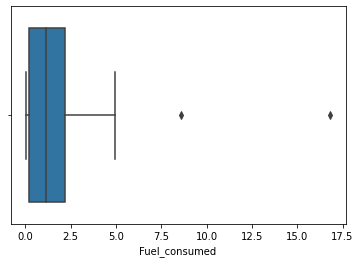

In [67]:
sns.boxplot(df_new_resampled['Fuel_consumed'])